# A Concise overview of Feature Selection Techniques
![FS](https://img.flaticon.com/icons/png/512/1998/1998575.png)

Top reasons to use feature selection are: It enables the machine learning algorithm to train faster. It reduces the complexity of a model and makes it easier to interpret. It improves the accuracy of a model if the right subset is chosen. [3]
**Feature Selection is one of the core concepts in Data Science & Machine Learning which have hugely impact the performance of a model**. The data features that are used to train machine learning models have a huge influence on the performance.
The problem we often face is to identify the related features from a set of data and removing the irrelevant or less important features with do not contribute much to our target variable in order to achieve better accuracy for our model. [1]

In this notebook, I will shed some light on some useful feature selection techniques simply you can use in Machine Learning. I will be using Python programming language in this case with sklearn.

Feature Selection Methods

Here, three feature selection techniques that are easy to use and also gives good results will be discussed.

0. Feature Correlation Matrix [.corr()]
1. Univariate Selection [SelectKBest with chi²]
2. Feature Importance [.feature_importances_]

Let’s explore these techniques one by one with an example dataset, "Breast Cancer Risk Prediction". You can download the dataset from [HERE](http://https://www.kaggle.com/uciml/breast-cancer-wisconsin-data). The dataset contains 32 features, but here I will try to select top 10 important features from the dataset.

In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier

In [2]:
#import dataset 
data = pd.read_csv('../input/breast-cancer-wisconsin-data/data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [3]:
data.drop(['Unnamed: 32','id'], axis = 1 , inplace=True)

**0. Feature Correlation Matrix with Heatmap Method**

This is the most common and efficient way to track down the important features in a dataset. Correlation states how the features are related to each other or the target variable. Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)

With visual representation, Heatmap makes it easy to identify which features are most related to the target variable, here the heatmap of correlated features is ploted using the seaborn library.

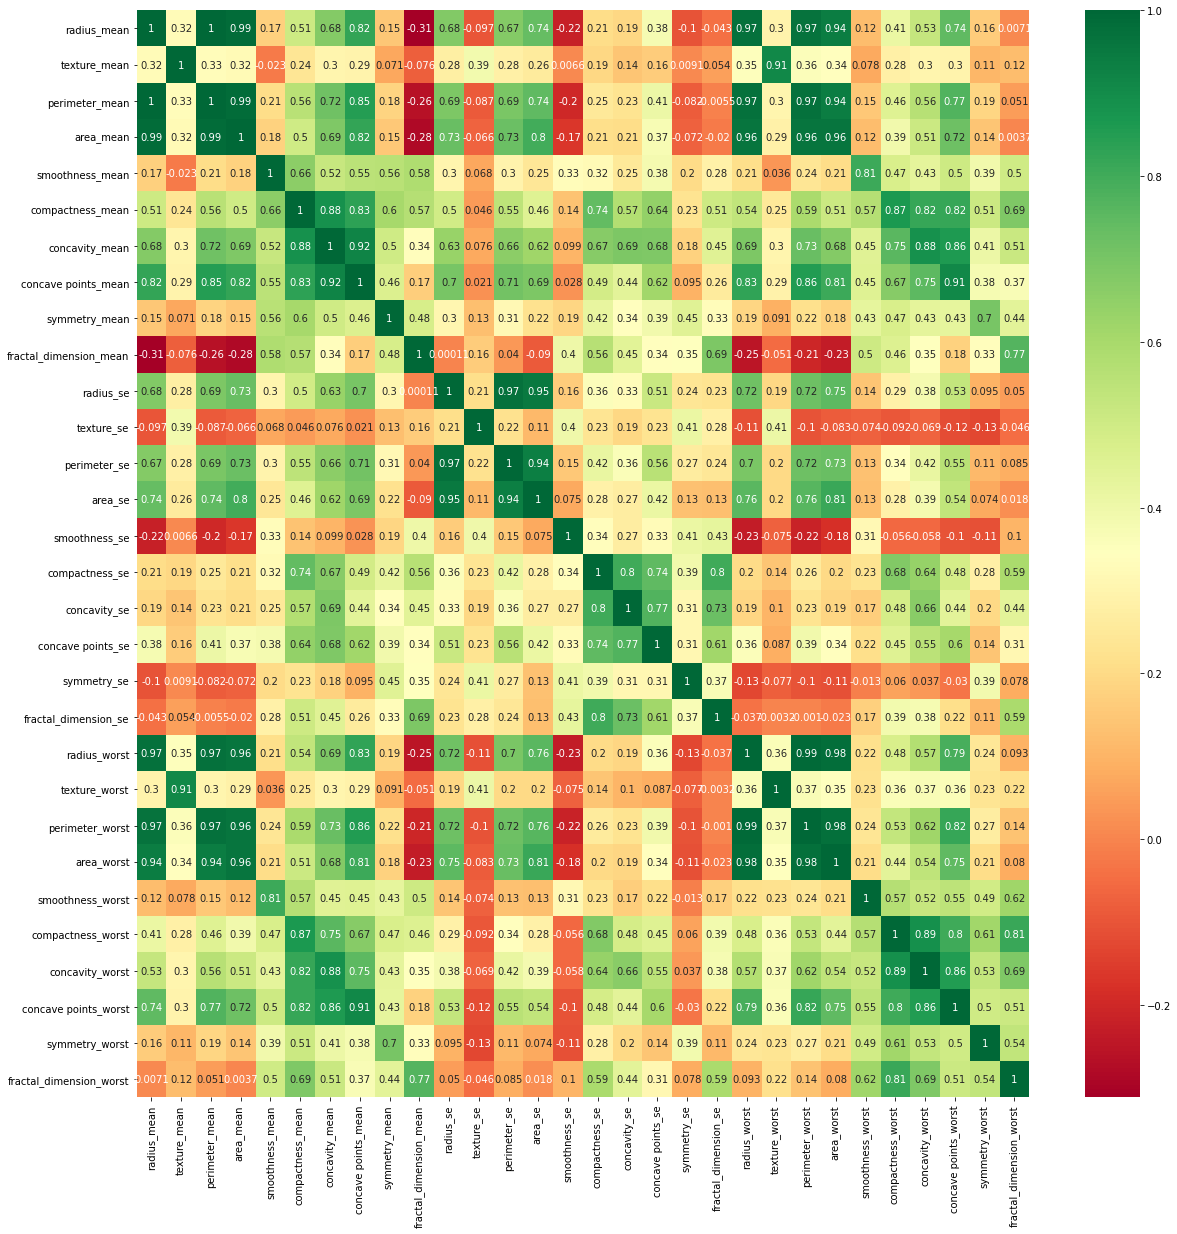

In [4]:
#get correlations of each features in dataset
corr_matrix = data.corr()
features_corr = corr_matrix.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[features_corr].corr(),annot=True,cmap="RdYlGn")

**1. Univariate Selection Method**

Statistical tests can be used to select those features that have the strongest relationship with the target variable. The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features. The example below uses the Chi-squared (chi²) statistical test for non-negative features to select 10 of the best features from the Breast Cancer Risk Prediction dataset.

In [5]:
X = data.loc[:, data.columns != 'diagnosis']
y = data['diagnosis']
#apply SelectKBest class to extract top 10 best features
kbest = SelectKBest(score_func=chi2, k=10)
fit = kbest.fit(X,y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
fScores = pd.concat([df_columns,df_scores],axis=1)
fScores.columns = ['Feature','Score']  #naming the dataframe columns
print(fScores.nlargest(10,'Score')) 
#print 10 best features

            Feature          Score
23       area_worst  112598.431564
3         area_mean   53991.655924
13          area_se    8758.504705
22  perimeter_worst    3665.035416
2    perimeter_mean    2011.102864
20     radius_worst     491.689157
0       radius_mean     266.104917
12     perimeter_se     250.571896
21    texture_worst     174.449400
1      texture_mean      93.897508


[Text(0.5, 0, 'Feature'), Text(0, 0.5, 'Importance')]

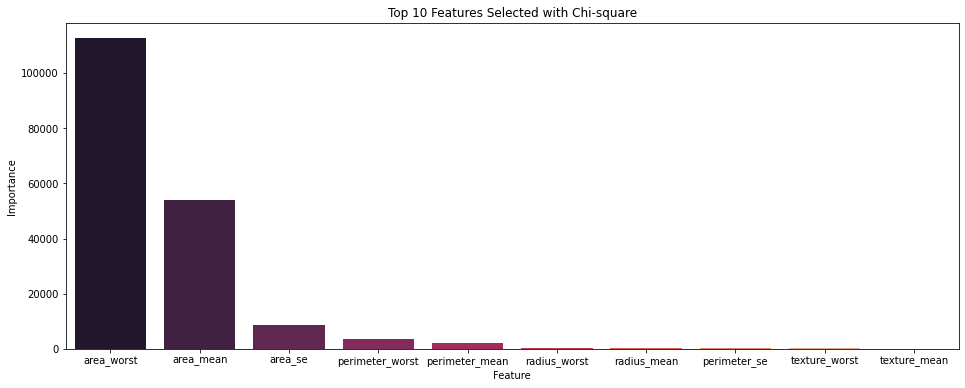

In [6]:
indices = np.argsort(kbest.scores_)[::-1]

features = []
for i in range(10):
    features.append(X.columns[indices[i]])

fig, ax = plt.subplots(figsize=(16,6))     
sns.barplot(x=features, y=kbest.scores_[indices[range(10)]],\
            label="Importtant Categorical Features", palette=("rocket"),ax=ax).set_title('Top 10 Features Selected with Chi-square')
ax.set(xlabel="Feature", ylabel = "Importance")

**2. Feature Importance Method**

The feature importance of each feature from the dataset can be estimated by using the feature importance property of the model. Feature importance gives a score for each feature of the data, the higher the score more important or relevant is the feature towards the target variable.

Feature importance is an inbuilt class that comes with Tree Based Classifiers, here Random Forest Classifier is used for extracting the top 10 features form the dataset. We will be calculating the **Information Gain** and **Gini Index** to select the most important features from the dataset.

 Feature                  Score
perimeter_worst         0.231029
area_worst              0.173634
concave points_worst    0.168990
concave points_mean     0.134037
radius_worst            0.122443
concavity_mean          0.029816
area_mean               0.023330
concavity_worst         0.020940
perimeter_mean          0.013753
radius_mean             0.013716
dtype: float64


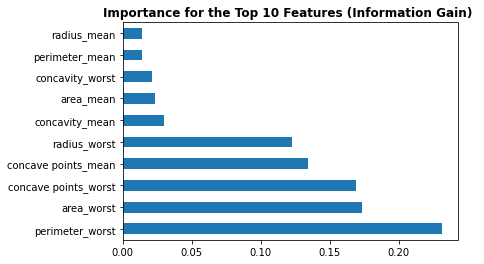

In [7]:
#Information Gain

#the model possesses tuned hyperparameter
model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=20,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=None,
            oob_score=False, random_state=42, verbose=0,
            warm_start=False)
model.fit(X,y)
#print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
imp_feat = feat_importances.nlargest(10)
print(" Feature                  Score")
print(imp_feat)

# determine 20 most important features
imp_feat = feat_importances.nlargest(10)
plt.title(f'Importance for the Top 10 Features (Information Gain) ', fontweight='bold')
imp_feat.plot(kind='barh')
plt.show()

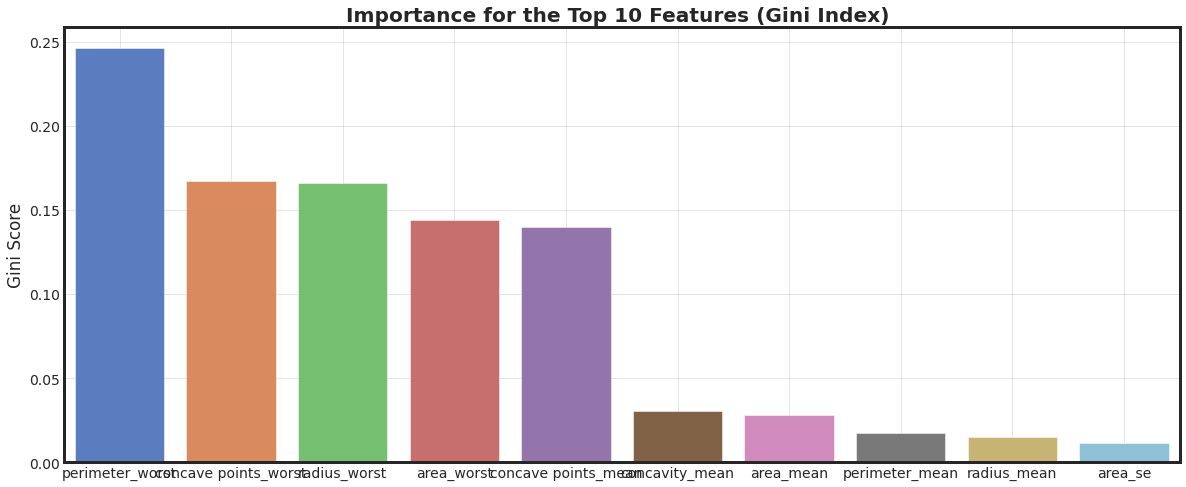

In [8]:
#Gini Index

model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                               max_features=10, min_samples_leaf=20,
                               min_samples_split=20, n_estimators=600, random_state= None)
model.fit(X,y)


feature_importance = {}
best_estimator_fi = model.feature_importances_

for feature, importance in zip(X.columns, best_estimator_fi):
    feature_importance[feature] = importance

f_importances = pd.DataFrame.from_dict(feature_importance, orient='index').rename(columns={0: 'Gini Score'})
importances = f_importances.sort_values(by='Gini Score', ascending=False)


# Plot for feature importance
plt.figure(figsize=(20, 8))
plt.style.use('fivethirtyeight')
sns.set_style("white")
sns.barplot(x=importances.index[0:10], y=importances['Gini Score'].iloc[0:10], palette='muted')
plt.title(f'Importance for the Top 10 Features (Gini Index) ', fontweight='bold')
plt.grid(True, alpha=0.1, color='black')
plt.show()

In this notebook, it is discussed how to select relevant features from data using Correlation matrix, Univariate selection and Feature importance technique. Previous studies showed that generating a heatmap for the correlation method is very useful as making decisions about which features to ultimately include in the new dataset.

If you find this discussion insightful, let me know, I will keep sharing stuff like this. 
@ThankYou

Ref. 
1. https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e?gi=d00ef7465ca2
2. https://medium.com/@nmscott14/3-feature-selection-methods-e7ccd6dbf316
3. https://www.analyticsvidhya.com/blog/2016/12/introduction-to-feature-selection-methods-with-an-example-or-how-to-select-the-right-variables/

***For more exciting notebooks visit my Kaggle workspace!***  [ https://www.kaggle.com/pankajbhowmik ]